In [23]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
Dataset = pd.read_csv('shop_smart_ecommerce.csv')
Dataset.head()


print(Dataset.isnull().sum())
# print(Dataset.dtypes)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [24]:
X = Dataset.drop(columns=["Revenue"])
y = Dataset["Revenue"].astype(int)

X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

Encoding

In [25]:
le = LabelEncoder()
X["Month"] = le.fit_transform(X["Month"])
X["VisitorType"] = le.fit_transform(X["VisitorType"])

# X.head()
#

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

In [27]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [28]:
y_pred = model.predict(X_test)

print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.8553663152203298


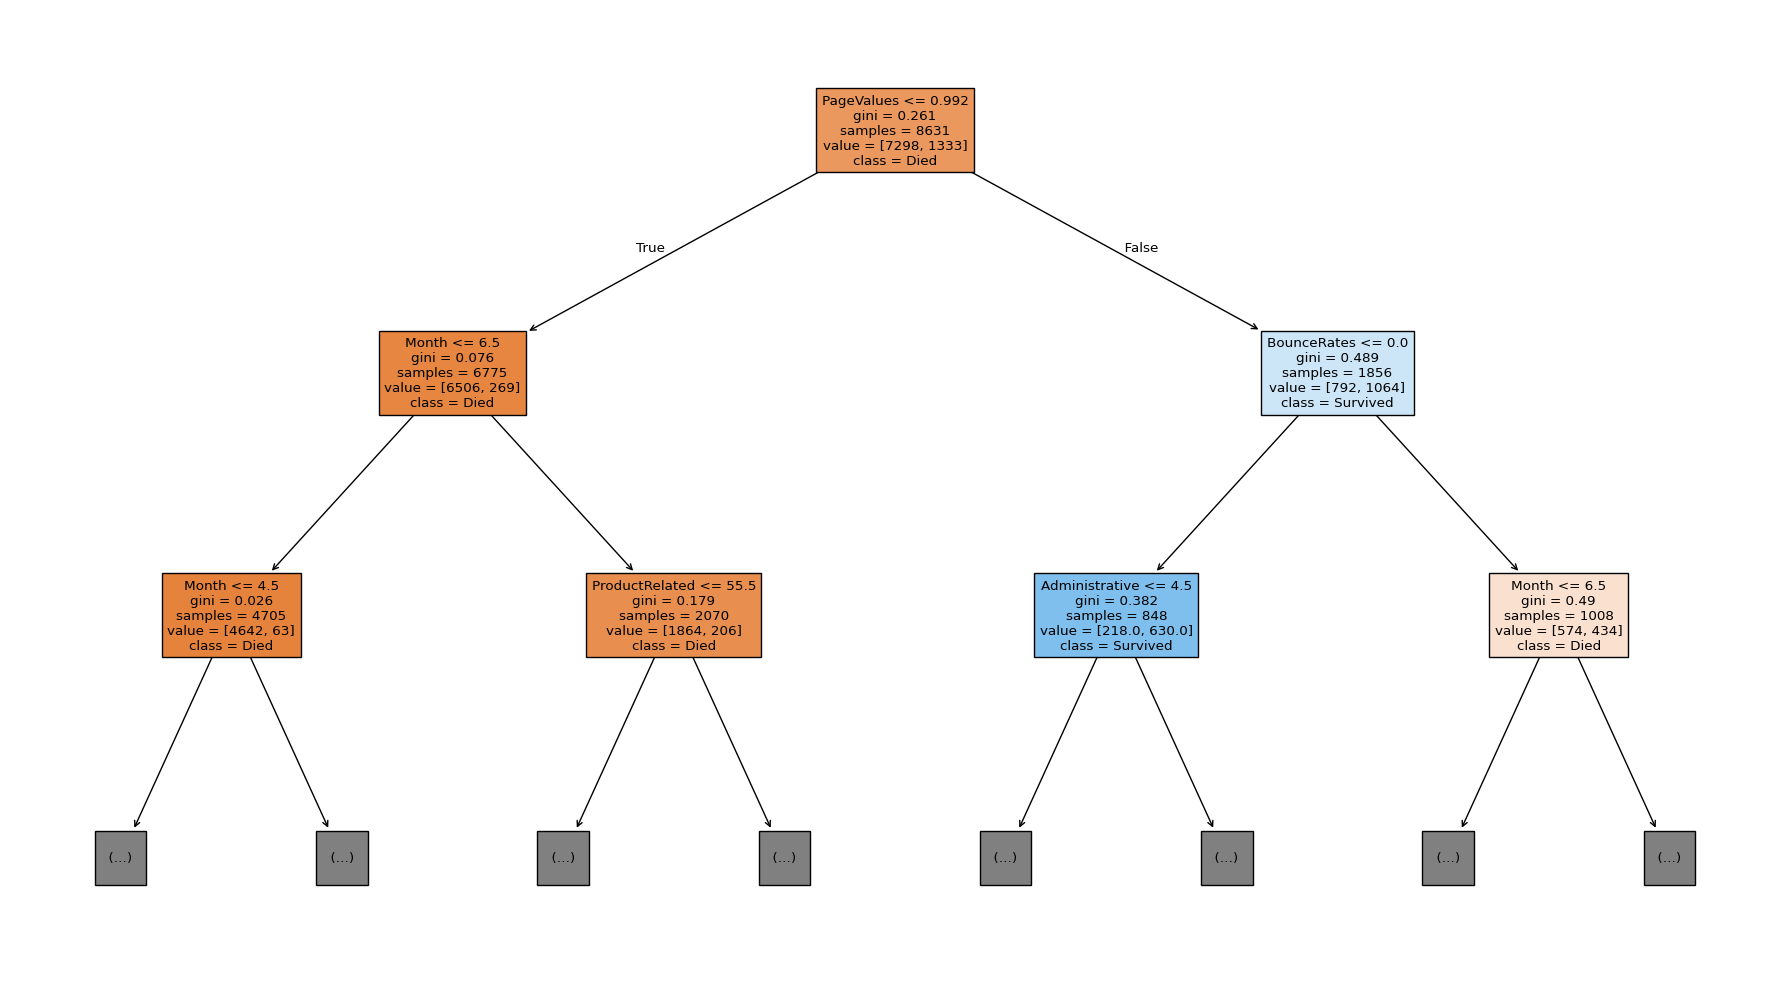

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True,
    max_depth=2
)

plt.tight_layout()
plt.show()

# Decision Tree with pre-pruning


for depth=2, accuracy=0.8837523655041903
for depth=3, accuracy=0.889970262233036
for depth=4, accuracy=0.8948364422816978


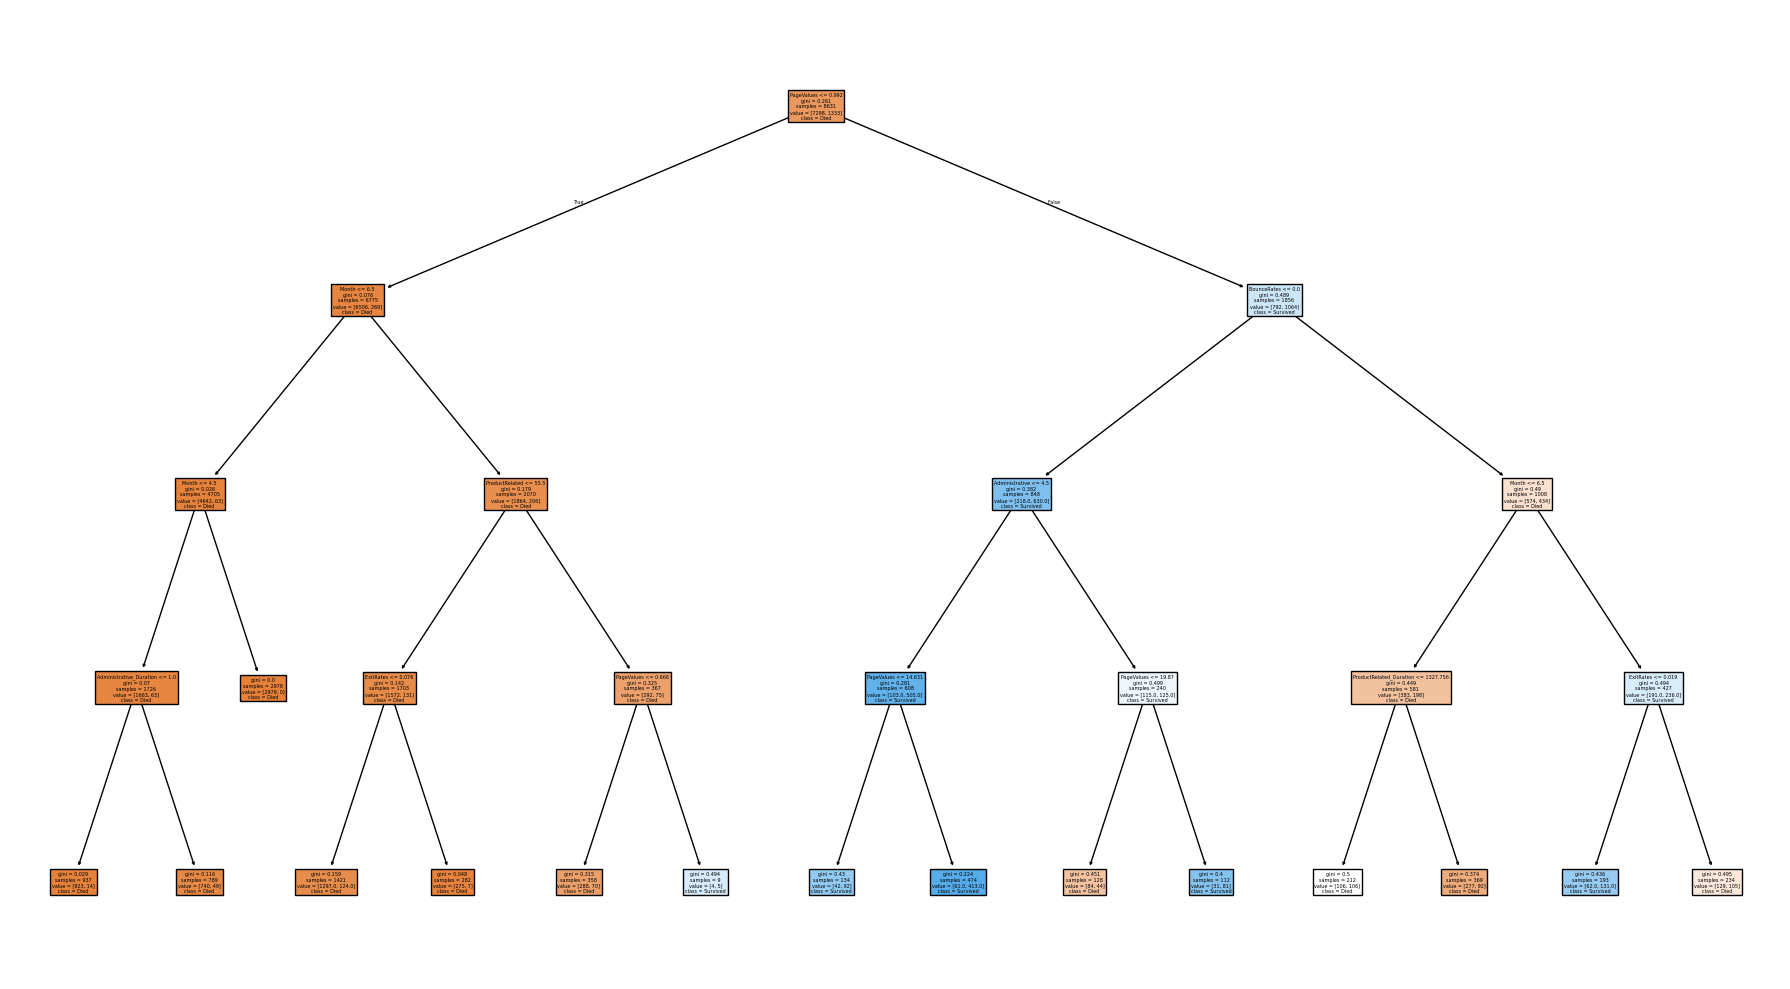

for depth=5, accuracy=0.8921330089213301
for depth=6, accuracy=0.8880778588807786
for depth=7, accuracy=0.8875371722087051
for depth=8, accuracy=0.8864557988645579
for depth=9, accuracy=0.8767234387672344
for depth=10, accuracy=0.8764530954311976


In [30]:
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for depth={depth}, accuracy={acc}")

    if depth==4:
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died", "Survived"],
            filled=True
        )
        
        plt.tight_layout()
        plt.show()

for sample split=5, accuracy=0.8948364422816978
for sample split=10, accuracy=0.8948364422816978


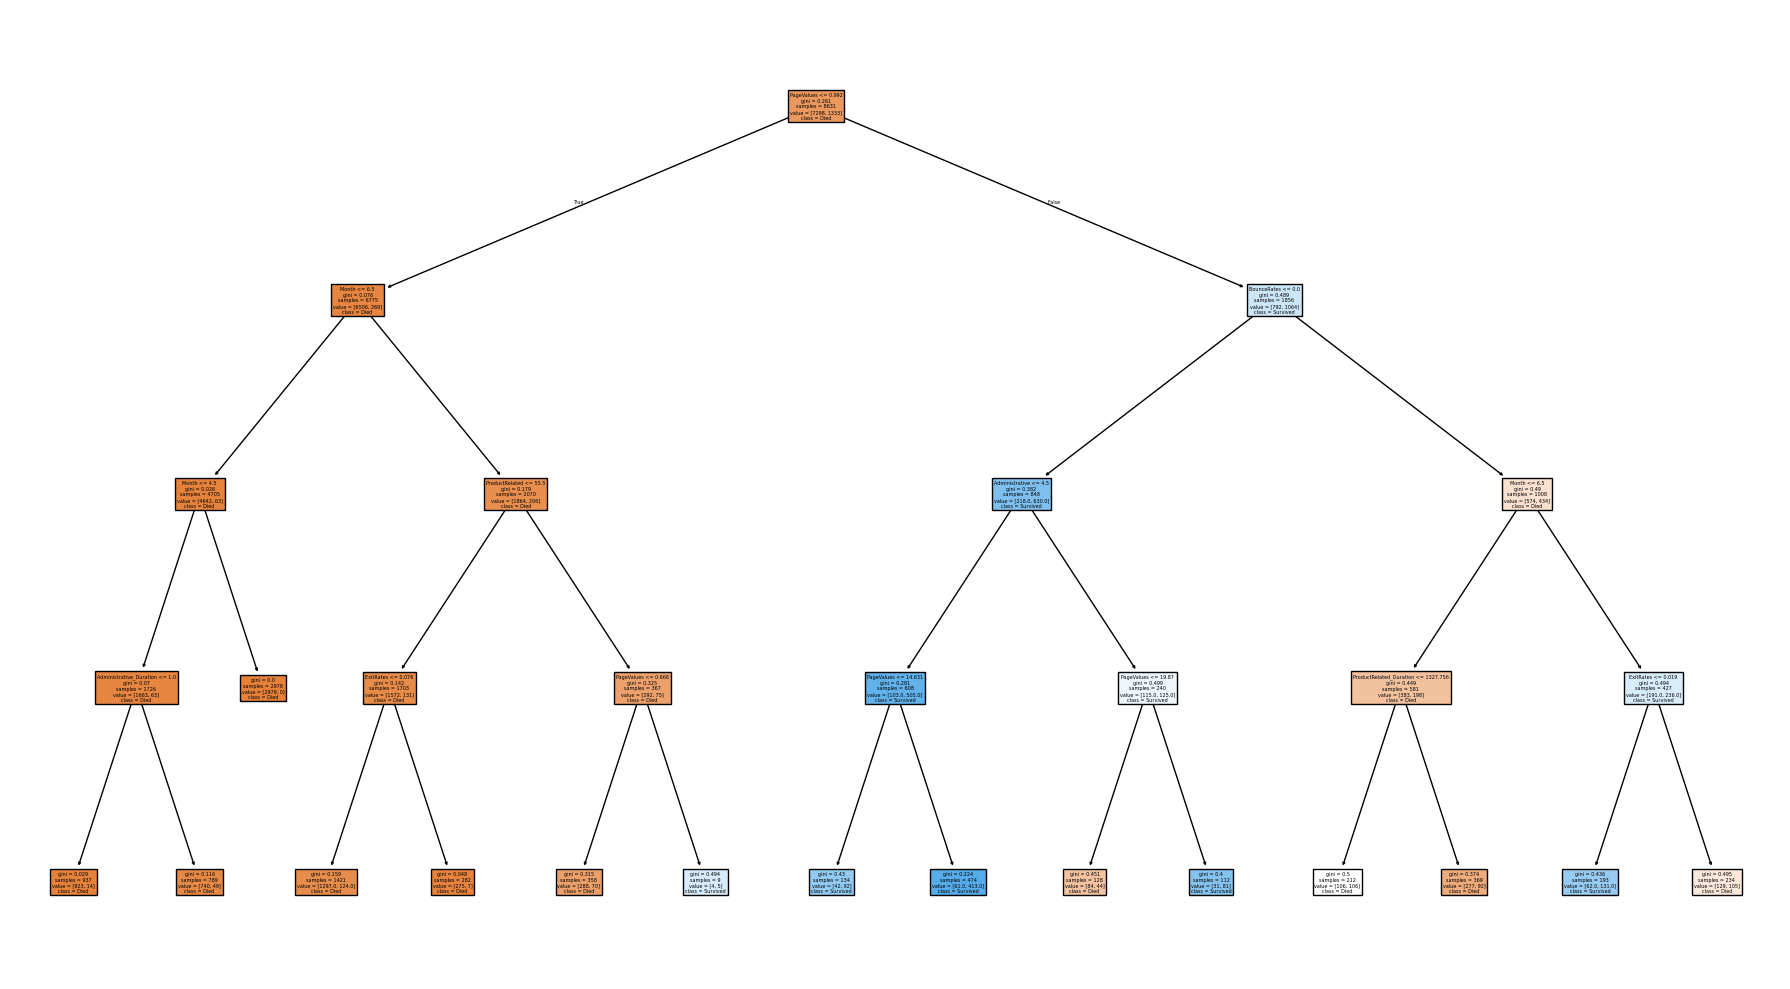

for sample split=15, accuracy=0.8948364422816978
for sample split=20, accuracy=0.8948364422816978
for sample split=25, accuracy=0.8948364422816978
for sample split=30, accuracy=0.8948364422816978


In [31]:
min_samples_splits = [5, 10, 15, 20, 25, 30]

for split in min_samples_splits:
    model = DecisionTreeClassifier(max_depth=4, min_samples_split=split)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for sample split={split}, accuracy={acc}")

    if split==10:
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died", "Survived"],
            filled=True
        )
        
        plt.tight_layout()
        plt.show()

In [32]:
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [33]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.00000000e+00 5.76732450e-05 7.43801771e-05 7.43801771e-05
 7.45774720e-05 7.45774720e-05 7.46662547e-05 7.62378239e-05
 7.63483910e-05 7.63921515e-05 7.68898579e-05 8.97926080e-05
 9.26891438e-05 9.49340779e-05 9.65511914e-05 9.73961154e-05
 9.79944354e-05 9.93097969e-05 9.93097969e-05 9.93097969e-05
 1.01378751e-04 1.01378751e-04 1.01378751e-04 1.01378751e-04
 1.02987938e-04 1.02987938e-04 1.04827008e-04 1.04827008e-04
 1.05328572e-04 1.05328572e-04 1.06206311e-04 1.06206311e-04
 1.06592515e-04 1.06949012e-04 1.06949012e-04 1.07279102e-04
 1.07585613e-04 1.07585613e-04 1.08620090e-04 1.08620090e-04
 1.08620090e-04 1.08620090e-04 1.08620090e-04 1.09046052e-04
 1.09046052e-04 1.09424684e-04 1.09424684e-04 1.09598650e-04
 1.09763460e-04 1.09763460e-04 1.09995028e-04 1.10068358e-04
 1.10068358e-04 1.10259697e-04 1.10344219e-04 1.10344219e-04
 1.10595001e-04 1.10595001e-04 1.10595001e-04 1.10823976e-04
 1.11033870e-04 1.11132392e-04 1.11226973e-04 1.11570266e-04
 1.11723522e-04 1.123504

In [34]:

trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)

    trees.append((model, alpha))

In [35]:
best_acc = 0
best_alpha = 0

for model, alpha in trees:
    curr_acc = model.score(X_test, y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha

In [36]:
best_acc

0.8961881589618816

In [37]:
best_model = DecisionTreeClassifier(ccp_alpha=best_alpha, max_depth=4)
best_model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

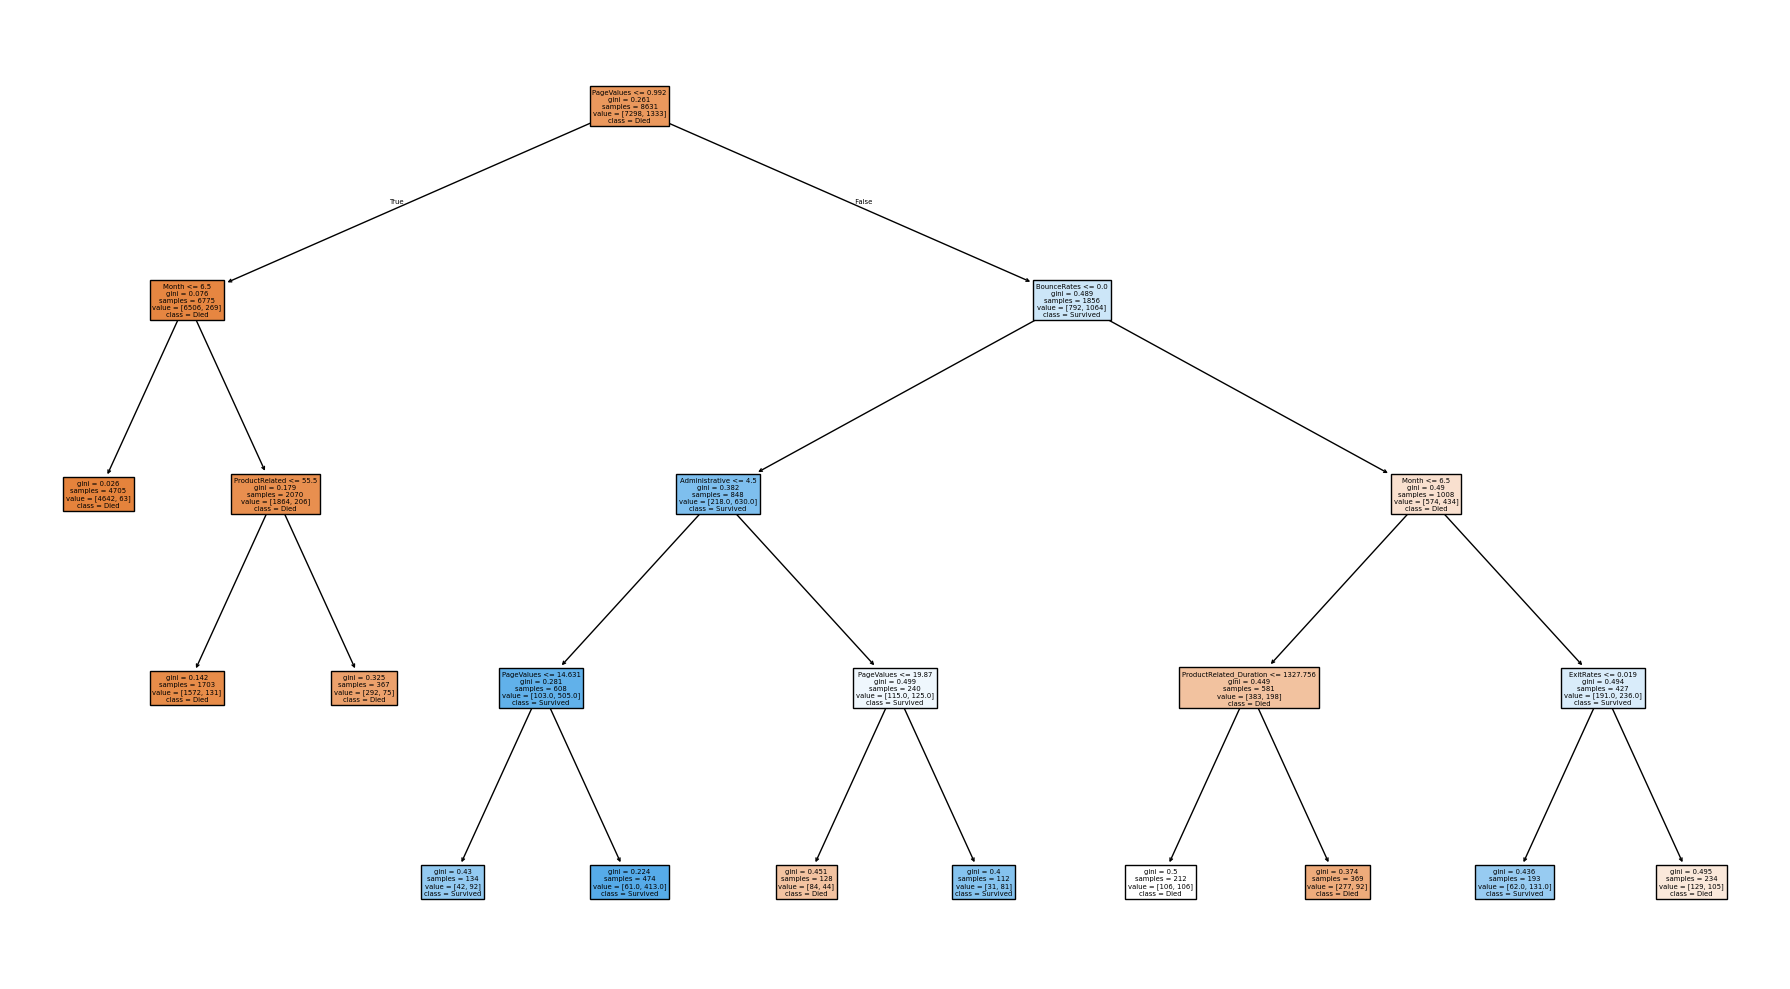

In [38]:
plt.figure(figsize=(18, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True
)
        
plt.tight_layout()
plt.show()

In [39]:
print(best_model.score(X_test, y_test))

0.8951067856177345
